# Auswertung 200213_3

### imports

In [3]:
import matplotlib.pyplot as plt
from readTrc import Trc
import numpy as np
import h5py
import json
from datetime import *
from os import listdir
from os.path import abspath, isfile, join
import re
from scipy.optimize import curve_fit
import math

### functions

In [4]:
def realGaussian(x, A, mu = None, sigma = None):
    if(mu == None):
        A, mu, sigma = A
    return A * np.exp(-np.power((x - mu) / sigma, 2) / 2) / (sigma * math.sqrt(2 * math.pi))

In [5]:
def readChannel(channel, traceName = "Trace"):
    
    data = []
    meta = []
    
    for fn in listdir(folderPath):
        if(re.match(r"^" + channel + traceName + "[0-9]{5}\.trc$", fn)):
            trc = Trc()
            trc.open(join(folderPath, fn))
            data.append(np.array((trc.x, trc.y)))
            meta.append(trc.d)
    return {
        "data": np.array(data),
        "meta": meta
    }

In [6]:
def fitChannel(data, areaMin, areaMax, gaussParams):
    fits = []

    for shot in data:
        
        fit_params, var_matrix = curve_fit(realGaussian, shot[0][areaMin:areaMax], shot[1][areaMin:areaMax], p0 = gaussParams)
        fits.append(fit_params)
        
    return np.array(fits)

In [7]:
def fitSingle(data, areaMin, areaMax, gaussParams):
        
    fit_params, var_matrix = curve_fit(realGaussian, data[0][areaMin:areaMax], data[1][areaMin:areaMax], p0 = gaussParams)
        
    return np.array(fit_params)

## processing

### global data

In [8]:
folder = "200213_3"

folderPath = join("..\\Rohdaten\\", folder)
h5Path = join("HDF5", folder + ".h5")

### import data

In [9]:
C1 = readChannel("C1")
C3 = readChannel("C3")

### view examples

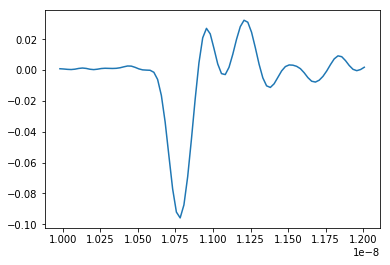

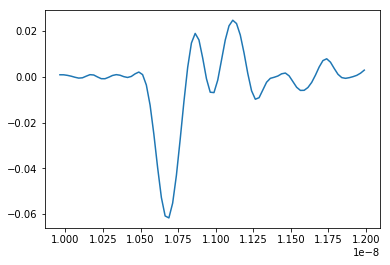

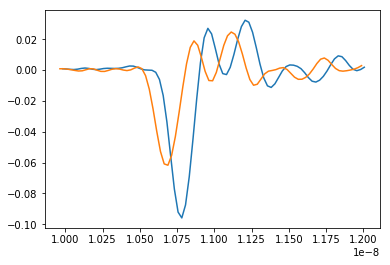

In [30]:
pulsnr = 15

plt.plot(C1["data"][pulsnr][0], C1["data"][pulsnr][1])
plt.show()
plt.plot(C3["data"][pulsnr][0], C3["data"][pulsnr][1])
plt.show()

plt.plot(C1["data"][pulsnr][0], C1["data"][pulsnr][1])
plt.plot(C3["data"][pulsnr][0], C3["data"][pulsnr][1])
plt.show()

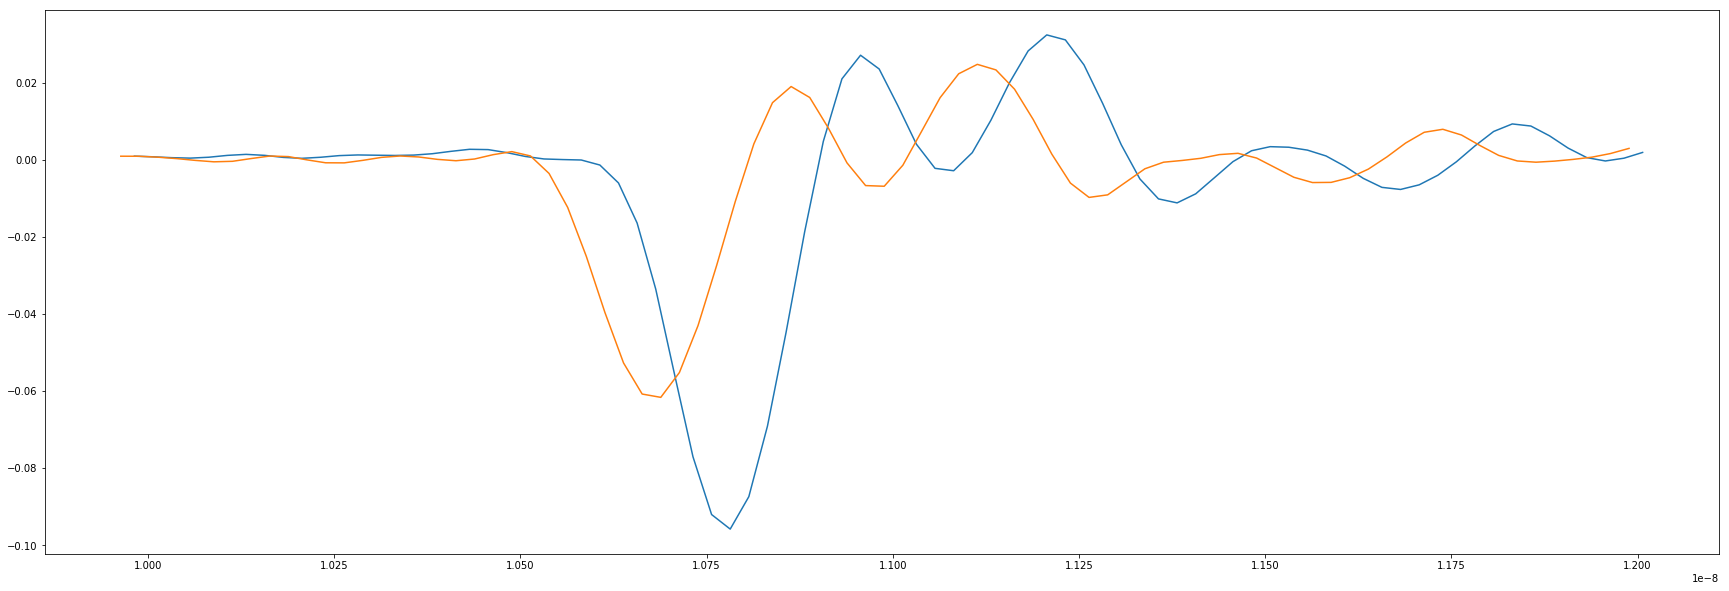

In [32]:
plt.figure(figsize=(30,10))
plt.plot(C1["data"][pulsnr][0], C1["data"][pulsnr][1])
plt.plot(C3["data"][pulsnr][0], C3["data"][pulsnr][1])

In [33]:
C1["data"][pulsnr][0] - C3["data"][pulsnr][0]

array([1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
       1.82183908e-11, 1.82183908e-11, 1.82183908e-11, 1.82183908e-11,
      

### define area of interest

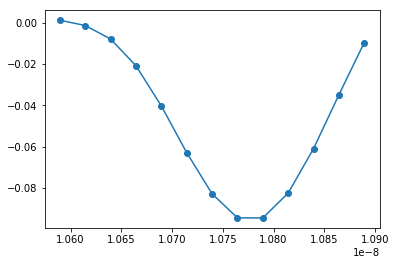

In [11]:
areaMinC1 = 25
areaMaxC1 = 38

plt.plot(C1["data"][0][0][areaMinC1:areaMaxC1], C1["data"][0][1][areaMinC1:areaMaxC1], "-o")
plt.show()

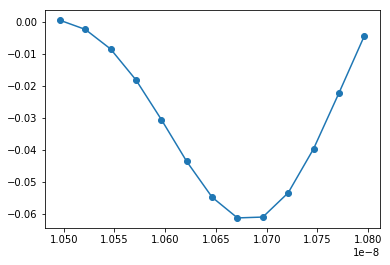

In [12]:
areaMinC3 = 21
areaMaxC3 = 34

plt.plot(C3["data"][0][0][areaMinC3:areaMaxC3], C3["data"][0][1][areaMinC3:areaMaxC3], "-o")
plt.show()

### fit gaussian function

In [13]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [14]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

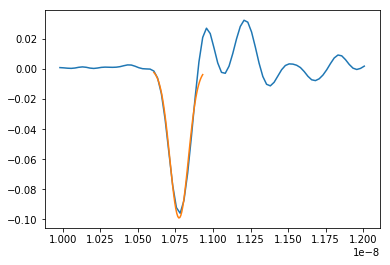

parameter: [-1.52325717e-11  1.07746767e-08  6.13751989e-11] [A, mu, sigma]


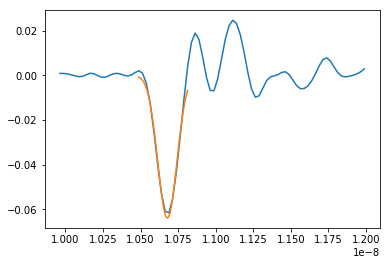

parameter: [-1.01976594e-11  1.06783325e-08  6.36406738e-11] [A, mu, sigma]


In [35]:
pulsNr = 15

plt.plot(C1["data"][pulsNr,0,:],C1["data"][pulsNr,1,:])
xFit = np.linspace(C1["data"][pulsNr,0,areaMinC1], C1["data"][pulsNr,0,areaMaxC1], 50)
plt.plot(xFit, realGaussian(xFit, C1["fit"][pulsNr]))
plt.show()
print("parameter:", C1["fit"][pulsNr], "[A, mu, sigma]")

plt.plot(C3["data"][pulsNr,0,:],C3["data"][pulsNr,1,:])
xFit = np.linspace(C3["data"][pulsNr,0,areaMinC3], C3["data"][pulsNr,0,areaMaxC3], 50)
plt.plot(xFit, realGaussian(xFit, C3["fit"][pulsNr]))
plt.show()
print("parameter:", C3["fit"][pulsNr], "[A, mu, sigma]")

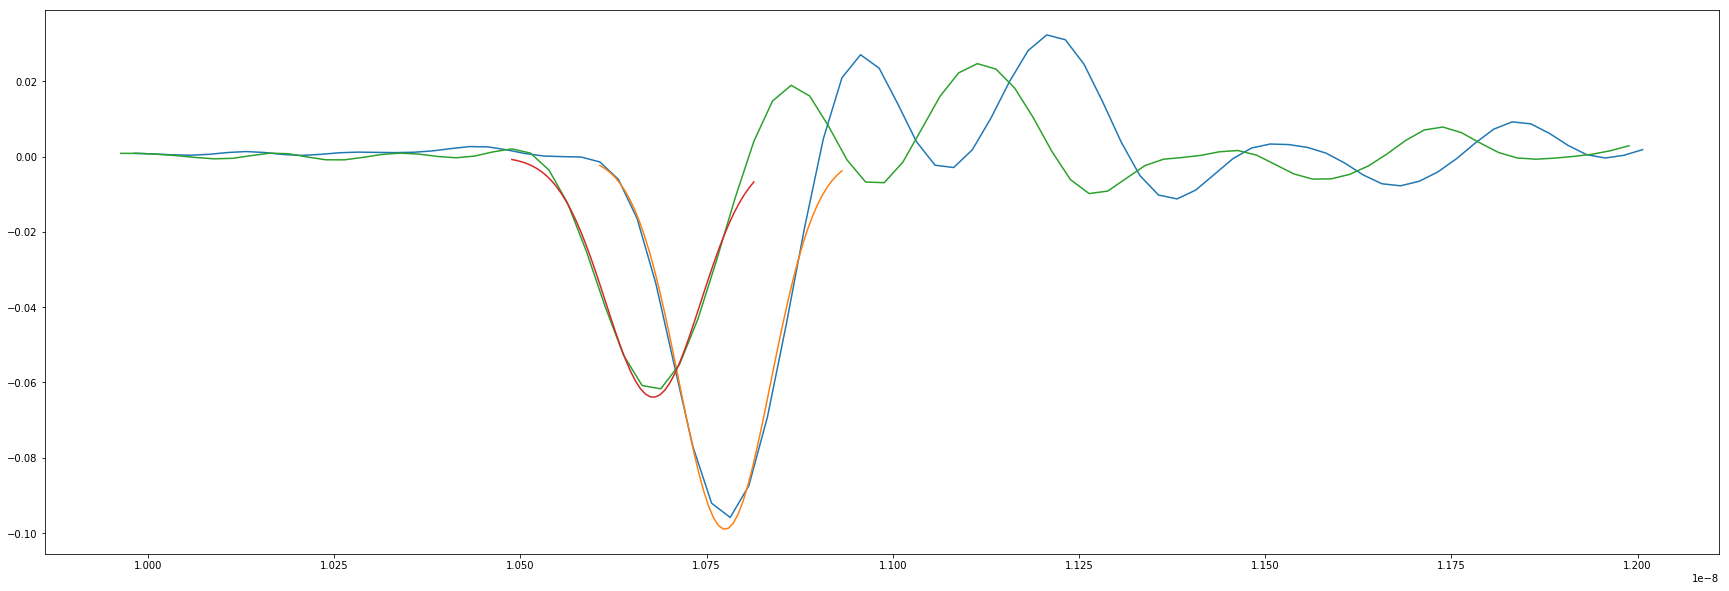

In [36]:
plt.figure(figsize=(30,10))
plt.plot(C1["data"][pulsNr,0,:],C1["data"][pulsNr,1,:])
xFit = np.linspace(C1["data"][pulsNr,0,areaMinC1], C1["data"][pulsNr,0,areaMaxC1], 50)
plt.plot(xFit, realGaussian(xFit, C1["fit"][pulsNr]))
plt.plot(C3["data"][pulsNr,0,:],C3["data"][pulsNr,1,:])
xFit = np.linspace(C3["data"][pulsNr,0,areaMinC3], C3["data"][pulsNr,0,areaMaxC3], 50)
plt.plot(xFit, realGaussian(xFit, C3["fit"][pulsNr]))

### view mu

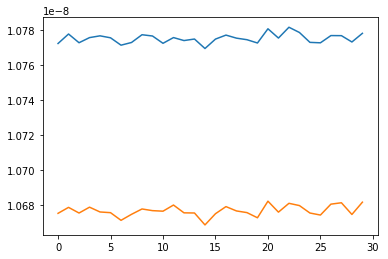

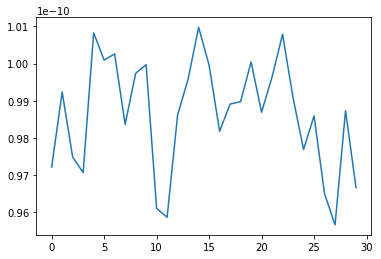

In [16]:
pulseMin = 100
pulseMax = 130

plt.plot(C1["fit"][pulseMin:pulseMax,1])
plt.plot(C3["fit"][pulseMin:pulseMax,1])
plt.show()

plt.plot(C1["fit"][pulseMin:pulseMax,1] - C3["fit"][pulseMin:pulseMax,1])
plt.show()

### filter

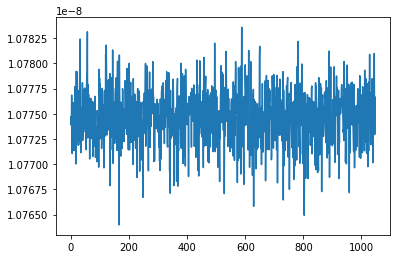

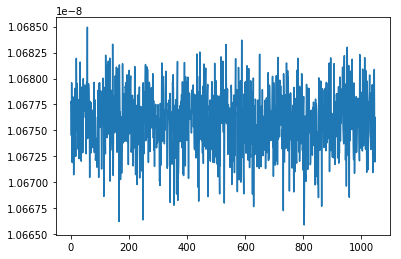

In [38]:
# repeat this chapter until all runaways are removed
# -> no spikes visible in this graphs

plt.plot(C1["fit"][:,1])
plt.show()
plt.plot(C3["fit"][:,1])
plt.show()

In [18]:
#find maximum
maximum = np.argmax(C3["fit"], axis=0)[1]
print(maximum)

57


In [309]:
#remove this pulse in data and fits, in each channel
C1["data"] = np.delete(C1["data"], maximum, axis=0)
C1["fit"]  = np.delete(C1["fit"],  maximum, axis=0)
C3["data"] = np.delete(C3["data"], maximum, axis=0)
C3["fit"]  = np.delete(C3["fit"],  maximum, axis=0)

### histogram

In [19]:
JitterGauss = C1["fit"][:,1] - C3["fit"][:,1]

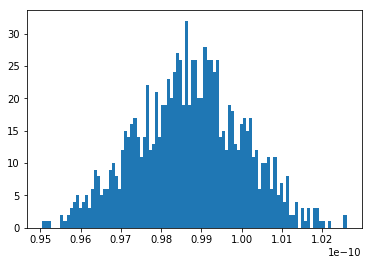

In [20]:
HistY, edges, plot = plt.hist(JitterGauss, 100)
HistX = (edges[1:] + edges[:-1]) / 2

### fit gauss to histogram

In [21]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1e-10, 1e-12]

In [22]:
HistFitParams = fitSingle(np.array([HistX, HistY]), None, None, gaussParamsHist)

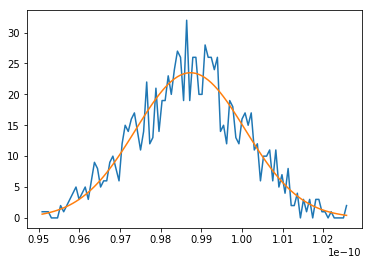

parameter: [7.95017811e-11 9.87306184e-11 1.34936194e-12] [A, mu, sigma]


In [23]:
plt.plot(HistX,HistY)
plt.plot(HistX, realGaussian(HistX, HistFitParams))
plt.show()
print("parameter:", HistFitParams, "[A, mu, sigma]")

## Result

In [24]:
Jitter = HistFitParams[2]

print("Sigma:", Jitter * 1e12, "ps")
print("zwischen beiden Messstrecken")

Sigma: 1.3493619375869572 ps
zwischen beiden Messstrecken


In [25]:
SingleJitter = Jitter / math.sqrt(2)

print("Jitter einer Messstsrecke in dieser Messreihe:")
print(SingleJitter * 1e12, "ps")

Jitter einer Messstsrecke in dieser Messreihe:
0.9541429763427564 ps


### save/read to HDF5-file

In [26]:
#create file
#-> TRUNCATES IF EXISTS!!!
f = h5py.File(h5Path, "w")

In [27]:
#save to file
#-> only possible if data in memory!!!
f_raw = f.create_group("raw")

f_C1  = f_raw.create_group("C1")
i = 0
for shot in C1["data"]:
    dset = f_C1.create_dataset("shot{:05d}".format(i), data = shot)
    for key, value in C1["meta"][i].items():
        try:
            if(type(value) is datetime):
                dset.attrs[key] = value.isoformat()
            else:
                dset.attrs[key] = value
        except:
            print("--- failed for attribute", key, value,"---")
    i += 1

f_C3  = f_raw.create_group("C3")
i = 0
for shot in C3["data"]:
    dset = f_C3.create_dataset("shot{:05d}".format(i), data = shot)
    for key, value in C3["meta"][i].items():
        try:
            if(type(value) is datetime):
                dset.attrs[key] = value.isoformat()
            else:
                dset.attrs[key] = value
        except:
            print("--- failed for attribute", key, value,"---")
    i += 1

    
f_gauss = f.create_group("gaussFit")

f_fit_C1 = f_gauss.create_dataset("gaussFitOnPulse_C1", data = C1["fit"])
f_fit_C1.attrs["axis0"] = "A"
f_fit_C1.attrs["axis1"] = "mu [s]"
f_fit_C1.attrs["axis2"] = "sigma [s]"

f_fit_C3 = f_gauss.create_dataset("gaussFitOnPulse_C3", data = C3["fit"])
f_fit_C3.attrs["axis0"] = "A"
f_fit_C3.attrs["axis1"] = "mu [s]"
f_fit_C3.attrs["axis2"] = "sigma [s]"

f_jitter = f_gauss.create_dataset("jitter_C1-C3", data = JitterGauss)
f_jitter.attrs["axis0"] = "difference in sigma C1 - C3 [s]"

f_hist   = f_gauss.create_dataset("histogramm_jitter", data = np.array((HistX, HistY)))
f_hist.attrs["axis0"] = "Time axis, center of bins. [s]"
f_hist.attrs["axis1"] = "Occurrency []"


f_results = f.create_group("results")
f_resultsGauss = f_results.create_dataset("gauss", data = h5py.Empty("f"))
f_resultsGauss.attrs["sigmaBoth"] = Jitter
f_resultsGauss.attrs["sigmaBothUnit"] = "[s]"
f_resultsGauss.attrs["sigmaSingle"] = SingleJitter
f_resultsGauss.attrs["sigmaSingleUnit"] = "[s]"

In [28]:
f.close()

## - - - playground - - -

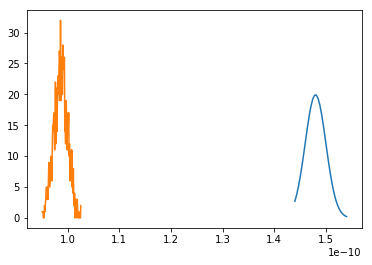

In [460]:
x = np.linspace(1.44e-10, 1.54e-10, 30)
y = realGaussian(x, [1e-10, 1.48e-10, 2e-12])
plt.plot(x, y)
plt.plot(HistX, HistY)

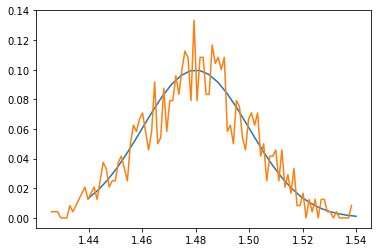

In [418]:
x = np.linspace(1.44, 1.54, 30)
y = realGaussian(x, [5e-3, 1.48, 2e-2])
plt.plot(x, y)
plt.plot(fakeX, fakeY)

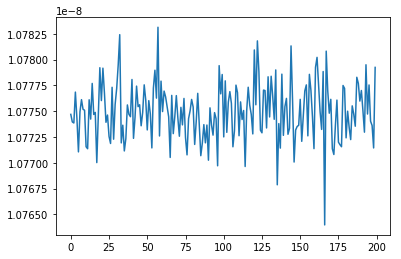

In [212]:
fits = np.array(C1["fit"])
plt.plot(fits[:200,1])

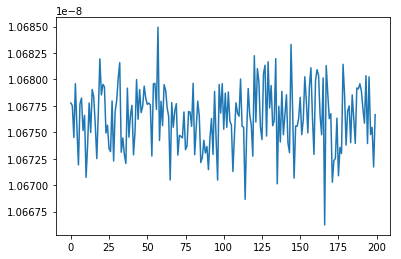

In [213]:
fits = np.array(C3["fit"])
plt.plot(fits[:200,1])

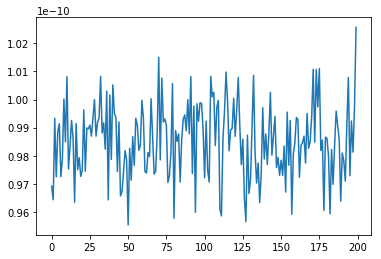

In [211]:
fits1 = np.array(C1["fit"])
fits3 = np.array(C3["fit"])
plt.plot(fits1[:200,1] - fits3[:200,1])

{'INSTRUMENT_NAME': 'LECROYWP760Zi-A', 'INSTRUMENT_NUMBER': 47498, 'TRACE_LABEL': '', 'WAVE_ARRAY_COUNT': 82, 'PNTS_PER_SCREEN': 80, 'FIRST_VALID_PNT': 0, 'LAST_VALID_PNT': 81, 'FIRST_POINT': 0, 'SPARSING_FACTOR': 1, 'SEGMENT_INDEX': 0, 'SUBARRAY_COUNT': 1, 'SWEEPS_PER_ACQ': 1, 'POINTS_PER_PAIR': 0, 'PAIR_OFFSET': 0, 'VERTICAL_GAIN': 2.7743299142457545e-06, 'VERTICAL_OFFSET': 0.03999999910593033, 'MAX_VALUE': 28580.0, 'MIN_VALUE': -28836.0, 'NOMINAL_BITS': 8, 'NOM_SUBARRAY_COUNT': 1, 'HORIZ_INTERVAL': 2.50000003337858e-11, 'HORIZ_OFFSET': 9.94608158029831e-09, 'PIXEL_OFFSET': 9.96e-09, 'VERTUNIT': 'V', 'HORUNIT': 'S', 'HORIZ_UNCERTAINTY': 9.999999960041972e-13, 'TRIGGER_TIME': datetime.datetime(2020, 2, 13, 15, 22, 15, 716851), 'ACQ_DURATION': 0.0, 'RECORD_TYPE': 'single_sweep', 'PROCESSING_DONE': 'no_processing', 'RIS_SWEEPS': 1, 'TIMEBASE': '200_ps/div', 'VERT_COUPLING': 'DC_50_Ohms', 'PROBE_ATT': 1.0, 'FIXED_VERT_GAIN': '20_mV/div', 'BANDWIDTH_LIMIT': False, 'VERTICAL_VERNIER': 1.0,

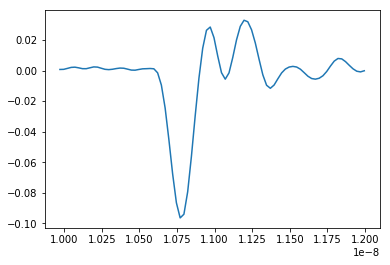

In [129]:
#read single TRC
sglFn = "C1Trace00012.trc"

sglTrc = Trc()
sglTrc.open(join(folderPath, sglFn))
plt.plot(sglTrc.x, sglTrc.y)

print(sglTrc.d)

{'INSTRUMENT_NAME': 'LECROYWP760Zi-A', 'INSTRUMENT_NUMBER': 47498, 'TRACE_LABEL': '', 'WAVE_ARRAY_COUNT': 82, 'PNTS_PER_SCREEN': 80, 'FIRST_VALID_PNT': 0, 'LAST_VALID_PNT': 81, 'FIRST_POINT': 0, 'SPARSING_FACTOR': 1, 'SEGMENT_INDEX': 0, 'SUBARRAY_COUNT': 1, 'SWEEPS_PER_ACQ': 1, 'POINTS_PER_PAIR': 0, 'PAIR_OFFSET': 0, 'VERTICAL_GAIN': 2.7743299142457545e-06, 'VERTICAL_OFFSET': 0.03999999910593033, 'MAX_VALUE': 28580.0, 'MIN_VALUE': -28836.0, 'NOMINAL_BITS': 8, 'NOM_SUBARRAY_COUNT': 1, 'HORIZ_INTERVAL': 2.50000003337858e-11, 'HORIZ_OFFSET': 9.952863189493714e-09, 'PIXEL_OFFSET': 9.96e-09, 'VERTUNIT': 'V', 'HORUNIT': 'S', 'HORIZ_UNCERTAINTY': 9.999999960041972e-13, 'TRIGGER_TIME': datetime.datetime(2020, 2, 13, 15, 22, 15, 716851), 'ACQ_DURATION': 0.0, 'RECORD_TYPE': 'single_sweep', 'PROCESSING_DONE': 'no_processing', 'RIS_SWEEPS': 1, 'TIMEBASE': '200_ps/div', 'VERT_COUPLING': 'DC_50_Ohms', 'PROBE_ATT': 1.0, 'FIXED_VERT_GAIN': '20_mV/div', 'BANDWIDTH_LIMIT': False, 'VERTICAL_VERNIER': 1.0

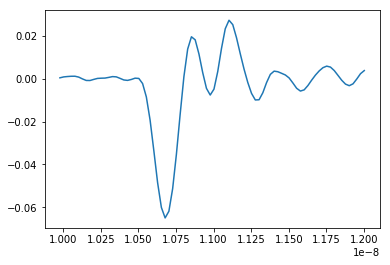

In [128]:
#read single TRC
sglFn = "C3Trace00012.trc"

sglTrc = Trc()
sglTrc.open(join(folderPath, sglFn))
plt.plot(sglTrc.x, sglTrc.y)

print(sglTrc.d)

In [33]:
#playground
C1 = np.array([[1,2,3,4,5,6]])
C1 = np.append(C1, [[6,5,4,3,2,1]], axis=0)
print(C1)
print(C1[0,4:6])

[[1 2 3 4 5 6]
 [6 5 4 3 2 1]]
[5 6]


In [87]:
#playground
C1 = np.array([[[1,2,3],[4,5,6]]])
C1 = np.append(C1, [[[6,5,4],[3,8,1]]], axis=0)
print(C1)
print("---")
print(C1[1])

[[[1 2 3]
  [4 5 6]]

 [[6 5 4]
  [3 8 1]]]
---
[[6 5 4]
 [3 8 1]]


In [136]:
# read all traces C1
#-> save to C1
channel = "C1"

C1 = {"data": [],
      "meta": []
}
for fn in listdir(folderPath):
    if(re.match(r"^" + channel + "Trace[0-9]{5}\.trc$", fn)):
        trc = Trc()
        trc.open(join(folderPath, fn))
        C1["data"].append(np.array((trc.x, trc.y)))
        C1["meta"].append(trc.d)
        
        #plt.plot(trc.x, trc.y)



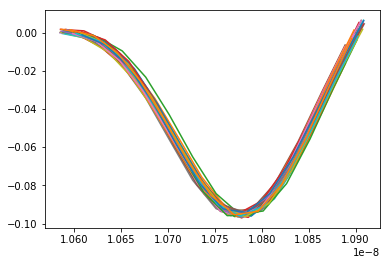

In [182]:
#print(C1[1])
minVal = 25
maxVal = 38
i = 0
for shot in C1["data"]:
    plt.plot(shot[0][minVal:maxVal], shot[1][minVal:maxVal])
    i += 1
    if(i>51):
        break

In [168]:
#fit gaussian C1
minVal = 25
maxVal = 38

C1["fit"] = []

for shot in C1["data"]:
    gaussParameters = [-0.1, 1.078e-8, 5e-11] # [A, mu, sigma]
    x = C1["data"][12][0][minVal:maxVal]
    y = C1["data"][12][1][minVal:maxVal]

    fit_params, var_matrix = curve_fit(realGaussian, shot[0][minVal:maxVal], shot[1][minVal:maxVal], p0 = gaussParameters)
    C1["fit"].append(fit_params)


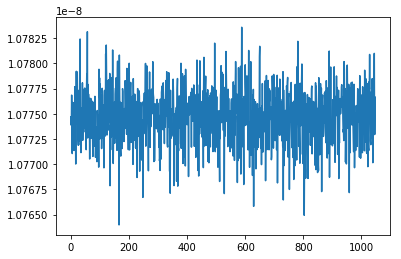

In [177]:
fits = np.array(C1["fit"])
plt.plot(fits[:,1])

In [163]:
fit_params

array([-1.53089232e-11,  1.07760988e-08,  6.13218211e-11])

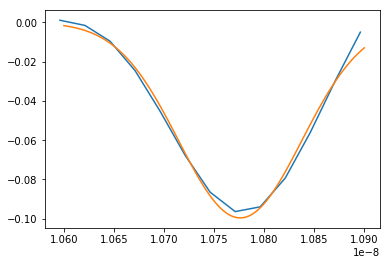

In [167]:
xfit = np.linspace(1.06e-8, 1.09e-8, 100)
yfit = realGaussian(xfit, fit_params)
plt.plot(x, y)
plt.plot(xfit, yfit)